# 6.2 Exploring Relationships

### Step 1. Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Import dataset
path = r'/Users/minglunchen/Desktop/A6_Project_Yiru'
df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'heart_2022_no_nans.csv'), index_col = False)

In [3]:
df_heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### Step 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

**Answers:**  
Questions regarding the most relevant indicators of heart disease are very much suitable for the exploratory visual analysis in this task. In this particular data set, nearly all variables are required to be explored.  

### Step 3. Create a correlation matrix heatmap (colored).  
- Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [4]:
# create a correlation matrix heatmap with seaborn
df_heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [5]:
# Many variables in the dataset are binary, I create a new dataframe replacing the text with '1' and '0' to make them easier to proceed.
df_replace =  df_heart[df_heart.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0, 'Yes, but only during pregnancy (female)':'1', 'No, pre-diabetes or borderline diabetes':'0', 'Tested positive using home test without a health professional': '1'})

In [6]:
df_replace.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,0,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,1.60,71.67,27.99,0,0,1,1,"Yes, received Tdap",0,0
1,Alabama,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,...,1.78,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
2,Alabama,1,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,...,1.85,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
3,Alabama,0,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,...,1.70,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,1
4,Alabama,0,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,...,1.55,79.38,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,0


In [7]:
# A subset including numerical and most critical variables was created for the heatmap.
sub = df_replace[['HadHeartAttack', 'Sex', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 
                  'HadAngina', 'HadStroke', 'HadDiabetes', 'BMI']]

In [8]:
sub

,HadHeartAttack,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadDiabetes,BMI
0,0,0,4.0,0.0,1,9.0,0,0,0,27.99
1,0,1,0.0,0.0,1,6.0,0,0,1,30.13
2,0,1,0.0,0.0,0,8.0,0,0,0,31.66
3,0,0,5.0,0.0,1,9.0,0,0,0,31.32
4,0,0,3.0,15.0,1,5.0,0,0,0,33.07
...,...,...,...,...,...,...,...,...,...,...
246017,0,1,0.0,0.0,1,6.0,0,0,0,32.28
246018,0,0,0.0,7.0,1,7.0,0,0,0,24.34
246019,0,1,0.0,15.0,1,7.0,0,1,1,29.86
246020,0,0,2.0,2.0,1,7.0,0,0,0,28.66


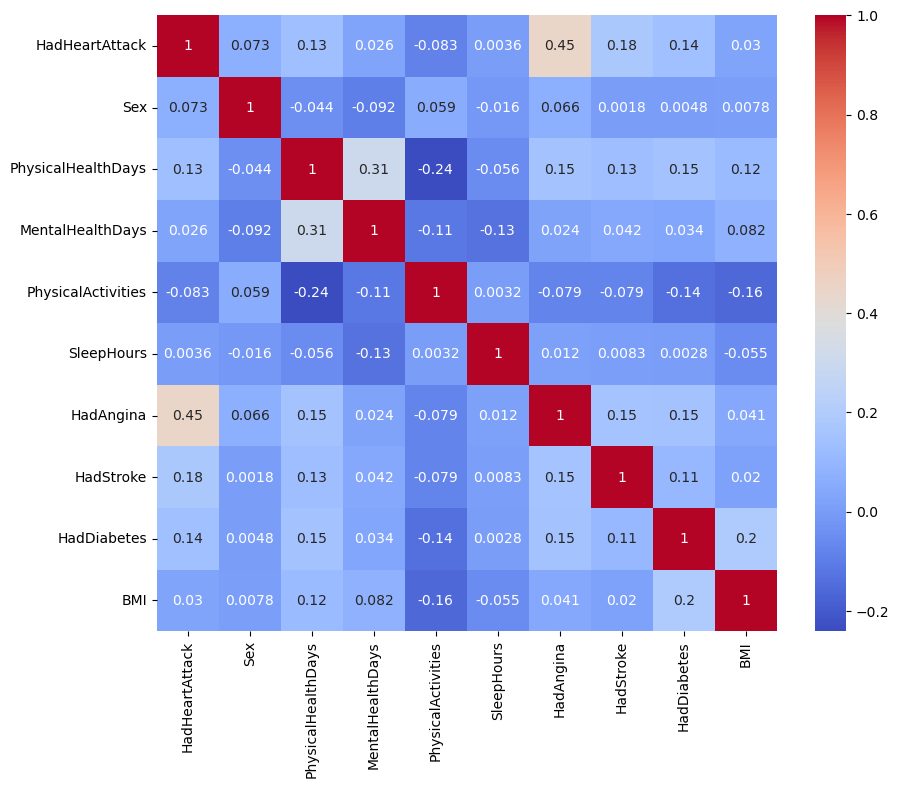

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto 
# the correlation matrix and the subplots defined above.
corr_heatmap = sns.heatmap(sub.corr(), annot = True, cmap ='coolwarm', ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [10]:
# Export the chart outside of Jupyter in the form of image file
corr_heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_heatmap.png'))

**Answers:**  
  
Among these investigated variables:  
- 'HadAngina' had a moderate relationship (0.45) with the heart disease, which is already the strongest one among investigated variables. 
- 'PhysicalHealthDays' had a moderate relationship (0.31) with 'MentalHealthDays'.    
- The relationships among other variables were relatively weak.

### Step 4: Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.  
- Discuss the output in a markdown cell.

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


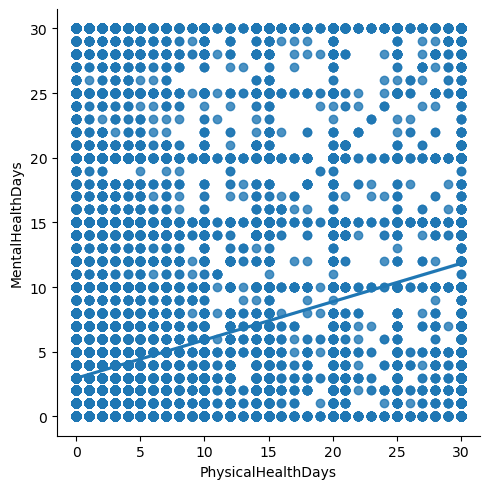

In [11]:
# Create a scattotplot for 
sca_phy_ment = sns.lmplot(x = 'PhysicalHealthDays', y = 'MentalHealthDays', data = df_heart)

In [12]:
# Export the chart outside of Jupyter in the form of image file
sca_phy_ment.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sca_phy_ment.png'))

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


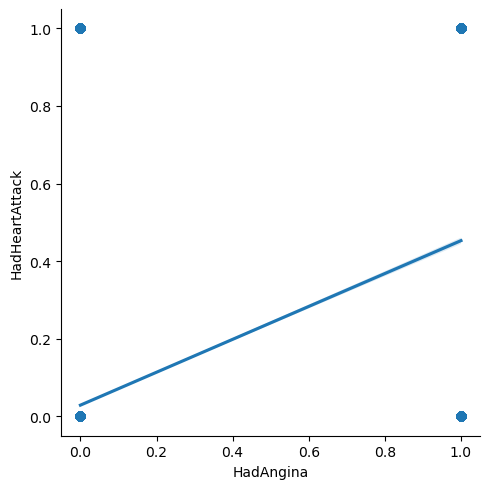

In [13]:
sca_angi_heart = sns.lmplot(x = 'HadAngina', y = 'HadHeartAttack', data = df_replace)

In [14]:
# Export the chart outside of Jupyter in the form of image file
sca_angi_heart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sca_angi_heart.png'))

**Answers:**  
  
Although there is a moderate relationship between 'HadAngina' and our target variable 'HadHeartAttack', the scattorplot of two binary variables seems making little sense (the second one).  
  
To practice interpreting a scattorplot, I created one with 'PhysicalHealthDays' and 'MentalHealthDays' (the first one). The relationship was moderate and positive, indicating the poor physical health days in past 30 days would lead to an increase in the poor mental health days in past 30 days.

### Step 5: Create a pair plot of the entire data set.  
- Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [15]:
# Due to the large number of variables, I decide to keep only limited variables in the pair plot
# Create a new subset to include those variables
sub_2 = sub[['HadHeartAttack', 'PhysicalHealthDays', 'MentalHealthDays', 'BMI']]

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

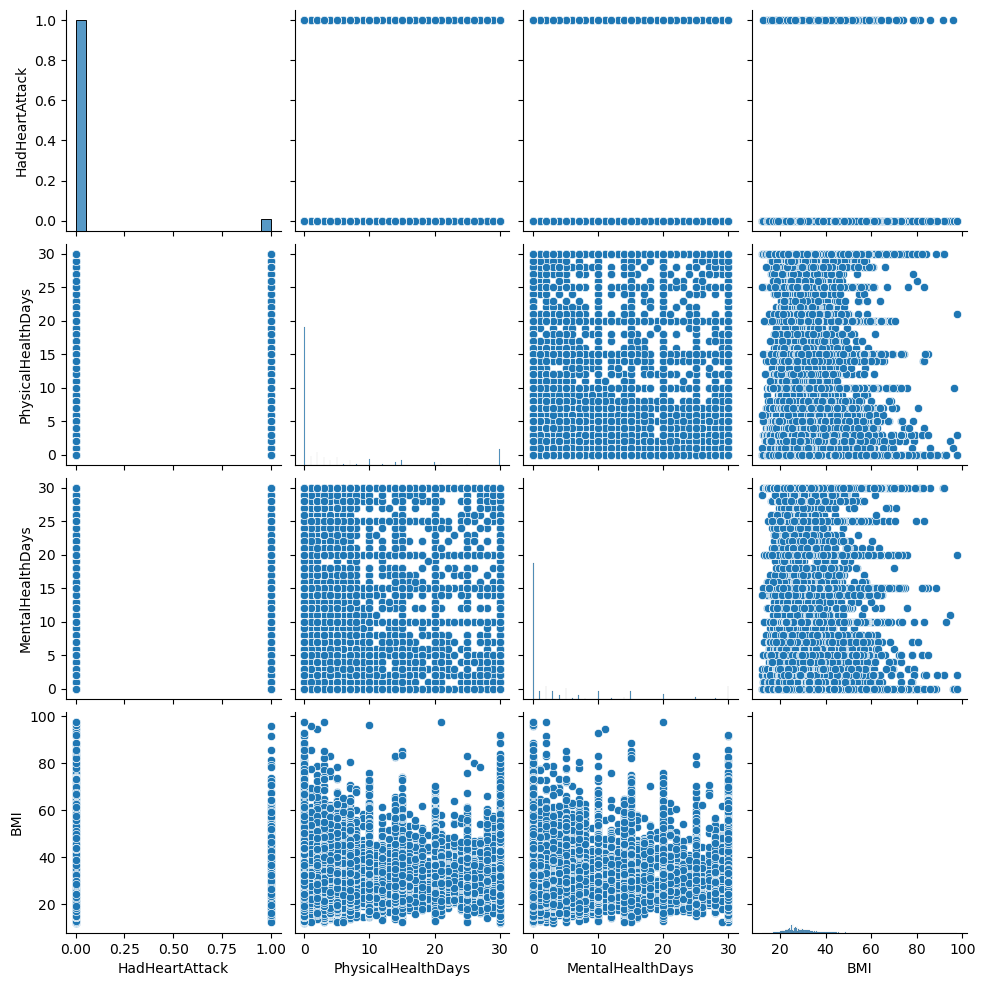

In [16]:
pairplot_heart = sns.pairplot(sub_2)

In [17]:
# Export the chart outside of Jupyter in the form of image file
pairplot_heart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot_heart.png'))

**Answers:**. 
  
The pairplot was created with selected numerical variables. I found it difficult to deal with binary variables with these scatter/pairplots. Strong relationship was not found based on the pairplot.

### Step 6: Create a categorical plot and interpret the results.

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


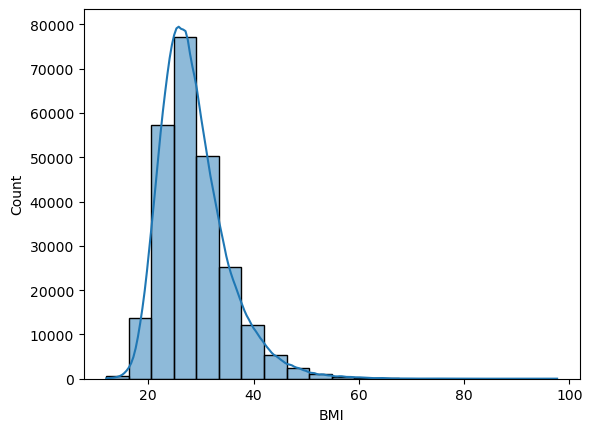

In [18]:
# Pick a variable from those numerical ones, e.g.'BMI', using histogram to visualize the distribution.
bmi_hist = sns.histplot(df_heart['BMI'], bins = 20, kde = True)

In [19]:
# Export the chart outside of Jupyter in the form of image file
bmi_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bmi_hist.png'))

In [20]:
df_heart['BMI'].describe()

count    246022.000000
mean         28.668136
std           6.513973
min          12.020000
25%          24.270000
50%          27.460000
75%          31.890000
max          97.650000
Name: BMI, dtype: float64

In [21]:
# Create a BMI catogory
df_heart.loc[df_heart['BMI'] < 25, 'BMI category'] = 'Low BMI'

In [22]:
df_heart.loc[(df_heart['BMI'] >= 25) & (df_heart['BMI'] < 32), 'BMI category'] = 'Middle BMI'

In [23]:
df_heart.loc[df_heart['BMI'] >= 32, 'BMI category'] = 'High BMI'

In [24]:
df_heart['BMI category'].value_counts(dropna = False)

BMI category
Middle BMI    111419
Low BMI        74180
High BMI       60423
Name: count, dtype: int64

In [25]:
# Check the created category
df_heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'BMI category'],
      dtype='object')

/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/minglunchen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


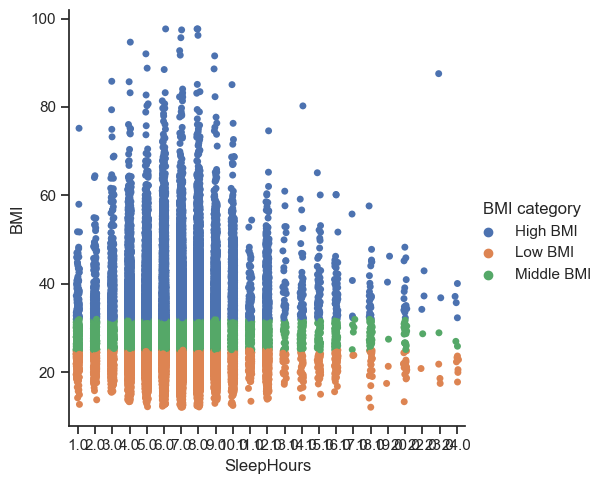

In [26]:
# Create a categorical plot in seaborn using the BMI categories created above with 'SleepHours' (numerical)
sns.set(style="ticks")
catplot_sleep_bmi = sns.catplot(x="SleepHours", y="BMI", hue="BMI category", data=df_heart)


In [27]:
# Export the chart outside of Jupyter in the form of image file
catplot_sleep_bmi.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot_sleep_bmi.png'))

**Answers:**. 
  
The first category plot was created for 'BMI category' and 'SleepHours': independent of BMI, sleep hours were mostly in the range of 5 and 8. And the BMI seems not strongly related with sleeping hours.

### Step 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

**Answers:**. 
  
Based on the above analysis, whether this individual had Angina before may have a moderate relationship with the heart disease. However, I was wondering whether the scattplot is a suitable approach to investigate this dataset given most variables are binary. 

### Step 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

**Answers:** 
  
Hypotheses may be:  
- Angina may be a significant factor leading to heart disease apart from high blood pressure, high cholesterol, and smoking which are stated by CDC.  
- A singular factor may not be the sole determinant of heart disease, a more accurate prediction could be achieved by considering the combination of multiple risk factors.